In [79]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pyramid-arima
!pip install pmdarima
from pmdarima.arima import auto_arima

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-rpifgbkm/pyramid-arima_c2afd085f71f4cb79a9b1069c52d799a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-rpifgbkm/pyramid-arima_c2afd085f71f4cb79a9b1069c52d799a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-q0keyx0x/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyramid-arima Check the logs for ful

In [80]:
std=StandardScaler()
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [81]:
!git clone https://github.com/zachberchu11/Worldwide-Analysis-of-COVID-cases-and-Forecasting

Cloning into 'Worldwide-Analysis-of-COVID-cases-and-Forecasting'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [82]:
covid= pd.read_csv('Worldwide-Analysis-of-COVID-cases-and-Forecasting/abcd (1).csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [83]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (191703, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     52321
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                 int64
ObservationDate    object
Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object


In [84]:
#Dropping column as SNo is of no use.
covid.drop(["SNo"],1,inplace=True)


In [85]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [86]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

## Datewise analysis

In [ ]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [ ]:
print("Basic Information")
print("--------------------------------------------------------------")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("--------------------------------------------------------------")
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("--------------------------------------------------------------")
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("--------------------------------------------------------------")
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
--------------------------------------------------------------
Totol number of countries with Disease Spread:  228
Total number of Confirmed Cases around the World:  82834592
Total number of Recovered Cases around the World:  46757476
Total number of Deaths Cases around the World:  1811843
--------------------------------------------------------------
Total number of Active Cases around the World:  34265273
Total number of Closed Cases around the World:  48569319
Approximate number of Confirmed Cases per Day around the World:  240798.0
Approximate number of Recovered Cases per Day around the World:  135923.0
Approximate number of Death Cases per Day around the World:  5267.0
--------------------------------------------------------------
Approximate number of Confirmed Cases per hour around the World:  10033.0
Approximate number of Recovered Cases per hour around the World:  5663.0
Approximate number of Death Cases per hour around the World:  219.0
--------------------

### Active Cases

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases


Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead.


###Closed Cases

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

Closed Cases = Number of Recovered Cases + Number of Death Cases

Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

### Weekly Growth Rate

In [ ]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

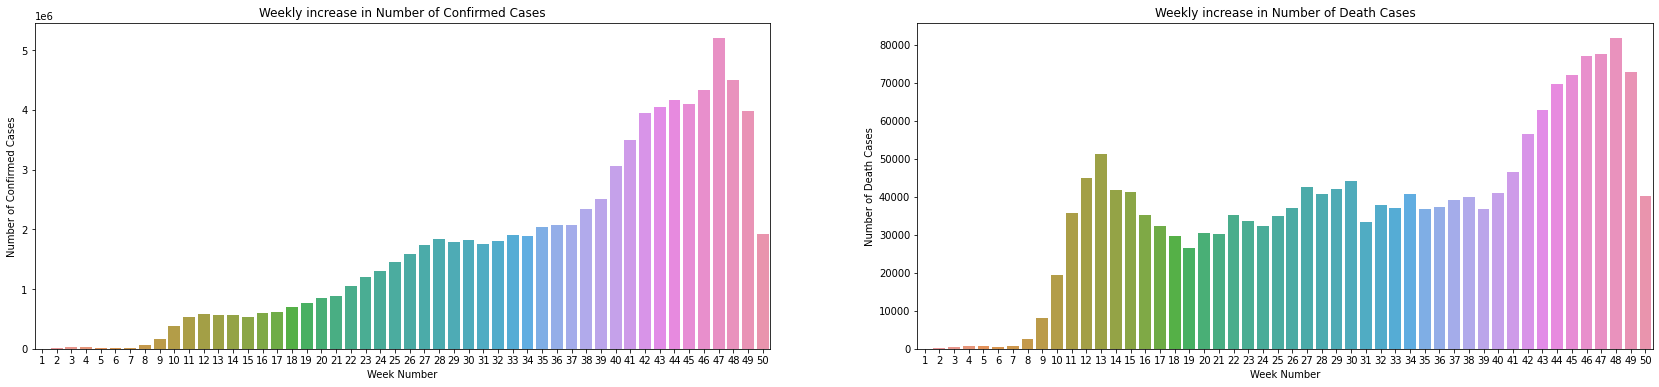

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(29,6))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

###Growth rate of Confirmed, Recovered and Death Cases


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

###Mortality and Recovery Rate analysis around the World

In [ ]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 3.9390773894201376
Median Mortality Rate 3.4201351845621755
Average Recovery Rate 48.52461508758495
Median Recovery Rate 55.204438966152175


Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100

Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

Mortality rate is showing a considerable for a pretty long time, which is positive sign

Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

In [ ]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average increase in number of Confirmed Cases every day:  240797.0
Average increase in number of Recovered Cases every day:  135923.0
Average increase in number of Deaths Cases every day:  5267.0


####Rate of Doubling for Confirmed Cases around the World

In [ ]:
c=560
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days Since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

In [ ]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
doubling_rate

,No. of cases,Days since first Case,Number of days for doubling
0,560,0 days,0 days
1,1120,2 days,2 days
2,2240,4 days,2 days
3,4480,5 days,1 days
4,8960,8 days,3 days
5,17920,11 days,3 days
6,35840,16 days,5 days
7,71680,25 days,9 days
8,143360,50 days,25 days
9,286720,58 days,8 days


Doubling Rate is fluctuating very much.

##Countrywise Analysis

In [ ]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


In [ ]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Deaths"])

In [ ]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])

Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

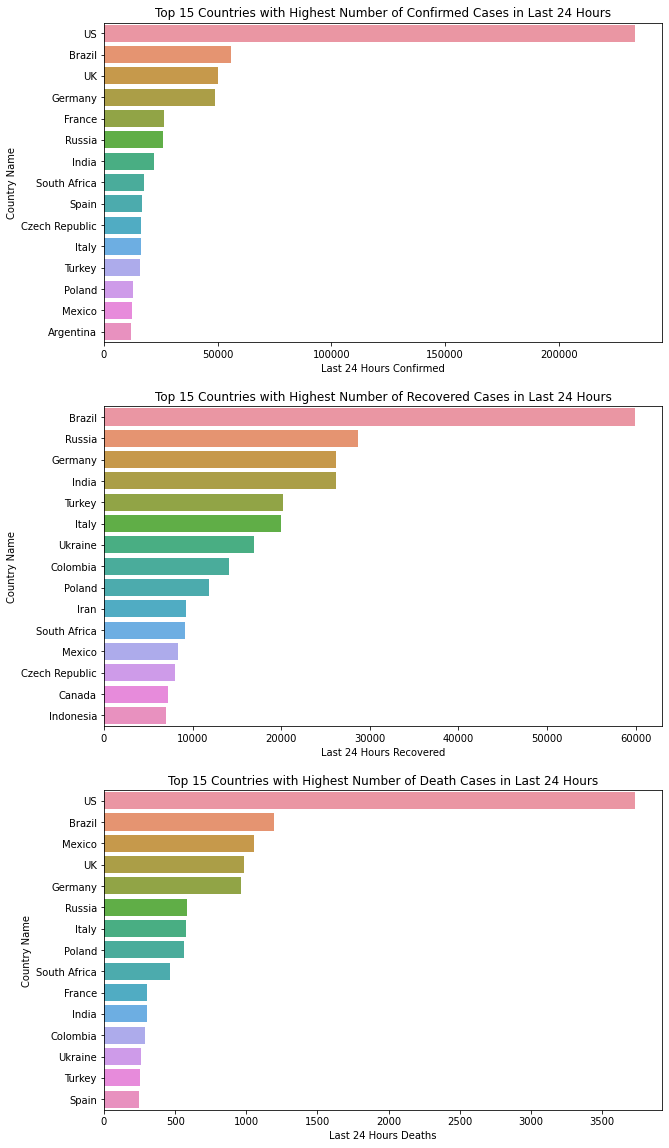

In [ ]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
sns.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")


In [ ]:
Last_24_Hours_country["Proportion of Confirmed"]=(Last_24_Hours_country["Last 24 Hours Confirmed"]/(datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Recovered"]=(Last_24_Hours_country["Last 24 Hours Recovered"]/(datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Deaths"]=(Last_24_Hours_country["Last 24 Hours Deaths"]/(datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2]))*100

####Proportion of Countries in Confirmed, Recovered and Death Cases


In [ ]:
Last_24_Hours_country[["Country Name","Proportion of Confirmed","Proportion of Recovered","Proportion of Deaths"]].sort_values(["Proportion of Confirmed"],ascending=False).style.background_gradient(cmap="Blues")

,Country Name,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths
0,US,30.698212,0.000000,24.792455
2,Brazil,7.310406,15.449265,7.929867
5,UK,6.599714,0.030908,6.521884
9,Germany,6.442731,6.747028,6.395696
4,France,3.483047,0.319386,2.018994
3,Russia,3.428005,7.387603,3.885236
1,India,2.866676,6.732604,1.985787
16,South Africa,2.326498,2.354441,3.088265
8,Spain,2.195920,0.000000,1.640433
20,Czech Republic,2.157035,2.056433,0.843462


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

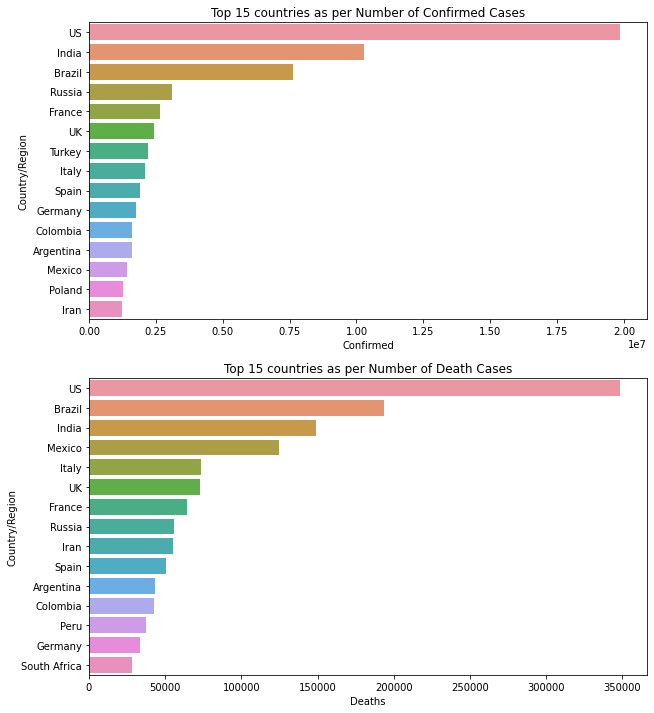

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

####Top 25 Countries as per Mortatlity Rate and Recovery Rate


Text(0.5, 0, 'Recovery (in Percentage)')

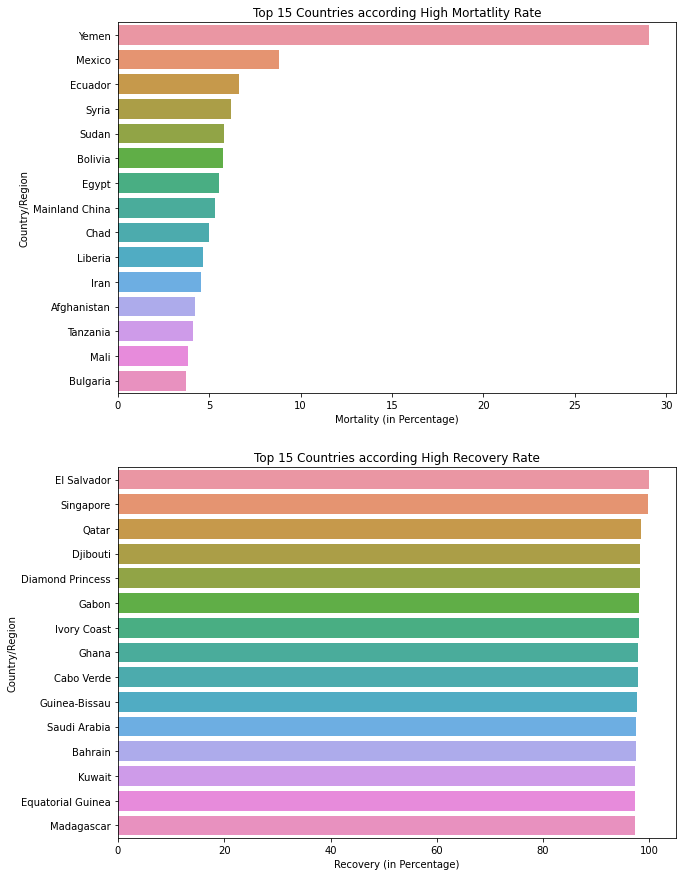

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

####Number of Confirmed Cases, with no Recovered patient 

In [ ]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
Belgium,644242,19441,3.017655
Sweden,437379,8727,1.995295
US,19863696,348683,1.755378
Serbia,334991,3163,0.944204


####Countries with Low Death Rates ang Higher Recovery Rates 

In [ ]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Cambodia,366,361,0,98.633880
Grenada,127,107,0,84.251969
Seychelles,256,212,0,82.812500
Saint Vincent and the Grenadines,115,89,0,77.391304
Bhutan,655,447,0,68.244275


Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

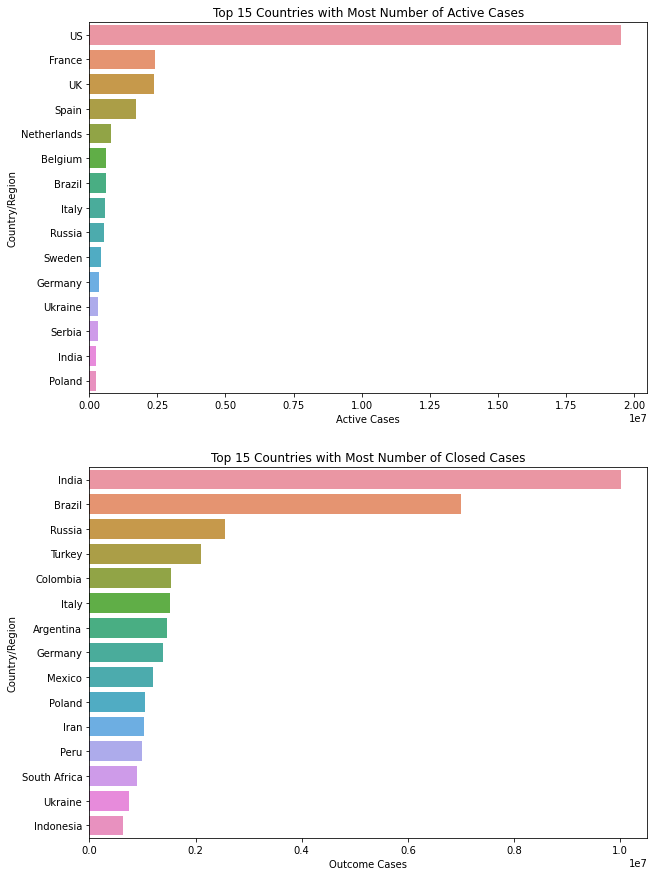

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [ ]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country]["log_confirmed"], y=grouped_country.loc[country]["log_active"],
                    mode='lines',name=country))
fig.update_layout(height=600,title="COVID-19 Journey of Top 15 Worst Affected Countries",
                 xaxis_title="Confirmed Cases (Logrithmic Scale)",yaxis_title="Active Cases (Logarithmic Scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

####Comparison of cases of China, US,  Brazil and UK with taking account of Confirmed, Recovered and Death Cases

In [ ]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
US_data=covid[covid["Country/Region"]=="US"]
brazil_data=covid[covid["Country/Region"]=="Brazil"]
uk_data=covid[covid["Country/Region"]=="UK"]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Brazil=brazil_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_UK=uk_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_china.index, y=(datewise_china["Confirmed"]),
                    mode='lines',name="China"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Confirmed"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Brazil.index, y=(datewise_Brazil["Confirmed"]),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=datewise_UK.index, y=(uk_data["Confirmed"]),
                    mode='lines',name="United Kingdom"))
fig.update_layout(title="Confirmed Cases plot",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_china.index, y=(datewise_china["Recovered"]),
                    mode='lines',name="China"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Recovered"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Brazil.index, y=(datewise_Brazil["Recovered"]),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=datewise_UK.index, y=(datewise_UK["Recovered"]),
                    mode='lines',name="UK"))
fig.update_layout(title="Recovered Cases plot",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_china.index, y=(datewise_china["Deaths"]),
                    mode='lines',name="China"))

fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Deaths"]),
                    mode='lines',name="United States"))

fig.add_trace(go.Scatter(x=datewise_Brazil.index, y=(datewise_Brazil["Deaths"]),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=datewise_UK.index, y=(datewise_UK["Deaths"]),
                    mode='lines',name="UK"))
fig.update_layout(title="Death Cases plot",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [ ]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Brazil["Mortality"]=(datewise_Brazil["Deaths"]/datewise_Brazil["Confirmed"])*100
datewise_UK["Mortality"]=(datewise_UK["Deaths"]/datewise_UK["Confirmed"])*100

datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Brazil["Recovery"]=(datewise_Brazil["Recovered"]/datewise_Brazil["Confirmed"])*100
datewise_UK["Recovery"]=(datewise_UK["Recovered"]/datewise_UK["Confirmed"])*100

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_china.index, y=(datewise_china["Mortality"]),
                    mode='lines',name="China"))

fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Mortality"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_UK.index, y=(datewise_UK["Mortality"]),
                    mode='lines',name="Brazil"))
fig.add_trace(go.Scatter(x=datewise_UK.index, y=(datewise_UK["Mortality"]),
                    mode='lines',name="UK"))
fig.update_layout(title="Mortality Rate comparison plot",
                  xaxis_title="Date",yaxis_title="Mortality Rate",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_china.index, y=(datewise_china["Recovery"]),
                    mode='lines',name="China"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Recovery"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_UK.index, y=(datewise_UK["Recovery"]),
                    mode='lines',name="UK"))
fig.add_trace(go.Scatter(x=datewise_Brazil.index, y=(datewise_Brazil["Recovery"]),
                    mode='lines',name="Brazil"))

fig.update_layout(title="Recovery Rate comparison plot",
                  xaxis_title="Date",yaxis_title="Recovery Rate",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

##Data Analysis for Nepal

In [ ]:
nepal_data=covid[covid["Country/Region"]=="Nepal"]
datewise_nepal=nepal_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_nepal.iloc[-1])
print("Total Active Cases: ",datewise_nepal["Confirmed"].iloc[-1]-datewise_nepal["Recovered"].iloc[-1]-datewise_nepal["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_nepal["Recovered"].iloc[-1]+datewise_nepal["Deaths"].iloc[-1])

Confirmed    260059
Recovered    251912
Deaths         1847
Name: 2020-12-30 00:00:00, dtype: int64
Total Active Cases:  6300
Total Closed Cases:  253759


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=datewise_nepal["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=datewise_nepal["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=datewise_nepal["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in Nepal",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=px.bar(x=datewise_nepal.index,y=datewise_nepal["Confirmed"]-datewise_nepal["Recovered"]-datewise_nepal["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases in Nepal",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

### Growth Factor Datewise for Active and Closed Clases 

In [ ]:
nepal_increase_confirm=[]
nepal_increase_recover=[]
nepal_increase_deaths=[]
for i in range(datewise_nepal.shape[0]-1):
    nepal_increase_confirm.append(((datewise_nepal["Confirmed"].iloc[i+1])/datewise_nepal["Confirmed"].iloc[i]))
    nepal_increase_recover.append(((datewise_nepal["Recovered"].iloc[i+1])/datewise_nepal["Recovered"].iloc[i]))
    nepal_increase_deaths.append(((datewise_nepal["Deaths"].iloc[i+1])/datewise_nepal["Deaths"].iloc[i]))
nepal_increase_confirm.insert(0,1)
nepal_increase_recover.insert(0,1)
nepal_increase_deaths.insert(0,1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=nepal_increase_confirm,
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=nepal_increase_recover,
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=nepal_increase_deaths,
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in Nepal",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

###Daily Increase of Cases

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=datewise_nepal["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=datewise_nepal["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=datewise_nepal["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in Nepal",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

###Weekly Growth of different types of cases

In [ ]:
datewise_nepal["WeekOfYear"]=datewise_nepal.index.weekofyear

week_num_nepal=[]
nepal_weekwise_confirmed=[]
nepal_weekwise_recovered=[]
nepal_weekwise_deaths=[]
w=1
for i in list(datewise_nepal["WeekOfYear"].unique()):
    nepal_weekwise_confirmed.append(datewise_nepal[datewise_nepal["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    nepal_weekwise_recovered.append(datewise_nepal[datewise_nepal["WeekOfYear"]==i]["Recovered"].iloc[-1])
    nepal_weekwise_deaths.append(datewise_nepal[datewise_nepal["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_nepal.append(w)
    w=w+1
    
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_nepal, y=nepal_weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_nepal, y=nepal_weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num_nepal, y=nepal_weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in Nepal",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Text(0.5, 1.0, "Nepal's Weekwise increase in Number of Death Cases")

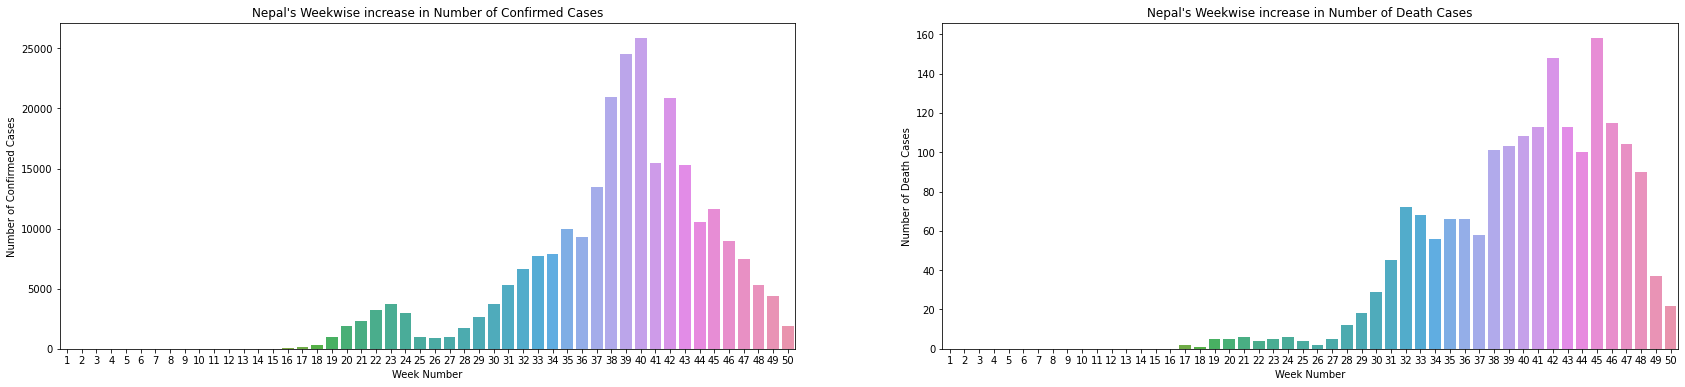

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(29,6))
sns.barplot(x=week_num_nepal,y=pd.Series(nepal_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_nepal,y=pd.Series(nepal_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Nepal's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("Nepal's Weekwise increase in Number of Death Cases")

In [ ]:
max_nep=datewise_nepal["Confirmed"].max()

print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_nep)].shape[0],"days in China to reach number of Confirmed Cases equivalent to Nepal")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_nep)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to Nepal")
print("It took",datewise_UK[(datewise_UK["Confirmed"]>0)&(datewise_UK["Confirmed"]<=max_nep)].shape[0],"days in UK to reach number of Confirmed Cases equivalent to Nepal")
print("It took",datewise_nepal[datewise_nepal["Confirmed"]>0].shape[0],"days in Nepal to reach",max_nep,"Confirmed Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_nep)].index, y=datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_nep)]["Confirmed"],
                    mode='lines',name="China"))
fig.add_trace(go.Scatter(x=datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_nep)].index, y=datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_nep)]["Confirmed"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=datewise_UK[(datewise_UK["Confirmed"]>0)&(datewise_UK["Confirmed"]<=max_nep)].index, y=datewise_UK[(datewise_UK["Confirmed"]>0)&(datewise_UK["Confirmed"]<=max_nep)]["Confirmed"],
                    mode='lines',name="UK"))
fig.add_trace(go.Scatter(x=datewise_nepal.index, y=datewise_nepal["Confirmed"],
                    mode='lines',name="Nepal"))
fig.update_layout(title="Growth of Recovered Cases with respect to Nepal",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It took 344 days in China to reach number of Confirmed Cases equivalent to Nepal
It took 72 days in USA to reach number of Confirmed Cases equivalent to Nepal
It took 114 days in UK to reach number of Confirmed Cases equivalent to Nepal
It took 341 days in Nepal to reach 260059 Confirmed Cases


#Prediction using Machine Learning Models

#### Linear Regression Model for Confirmed Cases Prediction


In [ ]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))


In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  24827071.41315106


In [ ]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear

Polynomial Regression for Prediction of Confirmed Cases

####Polynomial Regression for Prediction of Confirmed Cases

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
poly = PolynomialFeatures(degree = 8) 
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  4180295.1992798783


In [ ]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

####Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  13822015.892900005


In [ ]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

Support Vector Machine model isn't providing great results now, the predictions are either overshooting or really lower than what's expected.

In [ ]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2020-12-31,54876537.174777,74494840.357873,105552052.995534
1,2021-01-01,55074821.458912,74130736.445987,107263666.219554
2,2021-01-02,55273105.743047,73686216.295178,109000266.004538
3,2021-01-03,55471390.027182,73156800.312235,110762143.310514
4,2021-01-04,55669674.311317,72537841.526004,112549591.631246


#Time Series Forecasting

###AR Model (using AUTO ARIMA)

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=10,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8174.417, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8135.327, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8118.871, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=8087.369, Time=0.16 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=8030.541, Time=0.21 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0] intercept
Total fit time: 1.741 seconds


ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  1589656.2763842298


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,AR Model Prediction
0,2020-12-31,54876537.174777,74494840.357873,105552052.995534,86305111.707436
1,2021-01-01,55074821.458912,74130736.445987,107263666.219554,87118495.337806
2,2021-01-02,55273105.743047,73686216.295178,109000266.004538,88028382.427489
3,2021-01-03,55471390.027182,73156800.312235,110762143.310514,88951981.428305
4,2021-01-04,55669674.311317,72537841.526004,112549591.631246,89799201.327453


####ARIMA Model (using AUTOARIMA)

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8174.417, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=8071.917, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=8155.809, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=8134.650, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8135.327, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=8080.201, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=8098.440, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=8140.430, Time=0.65 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8118.871, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=8070.218, Time=0.16 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=8125.373, Time=0.34 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=8087.369, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=8017.137, Time=0.22 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=8001.673, Time=1.02 sec

Best model:  A

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  3064083.5079733245


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,AR Model Prediction,ARIMA Model Prediction
0,2020-12-31,54876537.174777,74494840.357873,105552052.995534,86305111.707436,89683562.491464
1,2021-01-01,55074821.458912,74130736.445987,107263666.219554,87118495.337806,90474208.894768
2,2021-01-02,55273105.743047,73686216.295178,109000266.004538,88028382.427489,91245108.553735
3,2021-01-03,55471390.027182,73156800.312235,110762143.310514,88951981.428305,92219419.638241
4,2021-01-04,55669674.311317,72537841.526004,112549591.631246,89799201.327453,93460616.914528


In [ ]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor", "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
3,Auto Regressive Model (AR),1589656.276384
4,Moving Average Model (MA),3064083.507973
1,Polynomial Regression,4180295.199280
2,Support Vector Machine Regressor,13822015.892900
0,Linear Regression,24827071.413151


#Summarization of Forecasts using different Models

In [ ]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor", "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
3,Auto Regressive Model (AR),1589656.276384
4,Moving Average Model (MA),3064083.507973
1,Polynomial Regression,4180295.199280
2,Support Vector Machine Regressor,13822015.892900
0,Linear Regression,24827071.413151


#Time Series Forecasting for Death Cases

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Death Cases"))
fig.update_layout(title="Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
model_arima_deaths=auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,
                              max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)     
model_arima_deaths.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5642.787, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5605.538, Time=0.22 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5566.757, Time=0.33 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=5560.142, Time=0.56 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=5507.849, Time=1.01 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=5501.289, Time=1.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5635.917, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=5569.196, Time=0.47 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5565.659, Time=0.72 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=5551.377, Time=0.91 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=5500.269, Time=1.13 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5631.145, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=5555.944, Time=0.61 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=5574.455, Time=0.91 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=5463.525, Time=1.34 sec
 ARIMA(3,2

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
predictions_deaths=model_arima_deaths.predict(len(valid))
y_pred["ARIMA Death Prediction"]=predictions_deaths
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(valid["Deaths"],predictions_deaths)))

Root Mean Square Error:  8177.98804919925


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Train Data for Death Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Deaths"],
                    mode='lines+markers',name="Validation Data for Death Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Death Prediction"],
                    mode='lines+markers',name="Prediction for Death Cases",))
fig.update_layout(title="Death Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
ARIMA_model_death_forecast=[]
for i in range(1,18):
    ARIMA_model_death_forecast.append(model_arima_deaths.predict(len(valid)+i)[-1])

In [ ]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Dates","ARIMA Model Death Forecast"])

,Dates,ARIMA Model Death Forecast
0,2020-12-31,1838129.193729
1,2021-01-01,1851317.614606
2,2021-01-02,1863647.021574
3,2021-01-03,1875398.639542
4,2021-01-04,1887279.587918
5,2021-01-05,1899882.747001
6,2021-01-06,1913271.254570
7,2021-01-07,1926975.292887
8,2021-01-08,1940370.779096
9,2021-01-09,1953138.500713


#Conclusion

COVID-19 doesn't have very high mortatlity rate as we can see which is the most positive take away. Also the healthy Recovery Rate implies the disease is cureable. The only matter of concern is the exponential growth rate of infection.

Countries like USA, Spain, United Kingdom,and Italy are facing some serious trouble in containing the disease showing how deadly the neglegence can lead to. The need of the hour is to perform COVID-19 pendemic controlling practices like Testing, Contact Tracing and Quarantine with a speed greater than the speed of disease spread at each country level.